In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
# Reading Data
data=pd.read_csv('/home/shivam/Downloads/data.csv')

In [74]:
# removing null values
data=data[data['game_season'].isnull()==False]
data=data[data['remaining_min'].isnull()==False]
data=data[data['distance_of_shot'].isnull()==False]
data.game_season=data.game_season.str.split('-').str[0].astype(int)

In [75]:
# grouping data by season ranges
seasons=data.groupby(pd.cut(data["game_season"], np.arange(1996, 2016, 3)))

In [76]:
# sorting the ranges in ascending order
sortedSeasonsKey=sorted(seasons.keys.value_counts().index)

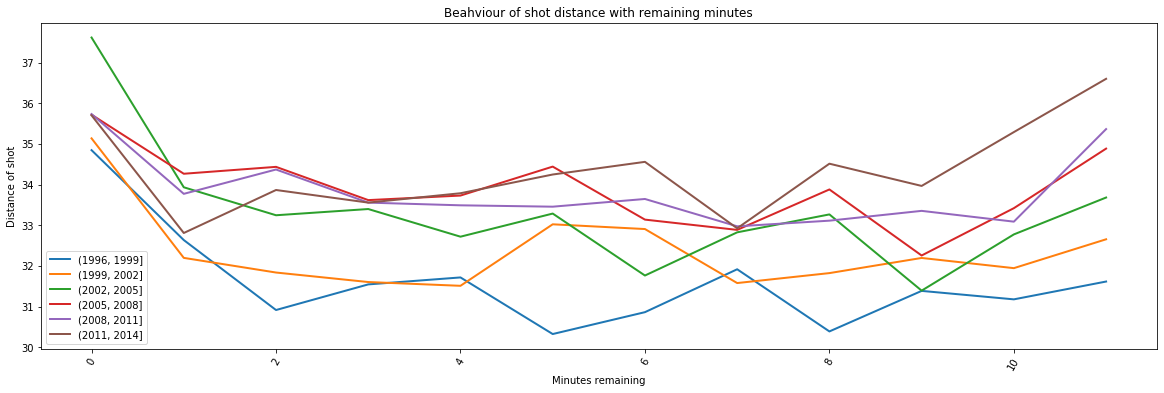

In [77]:
for season in sortedSeasonsKey:
#     getting the subgroup which is a df having data with years in a specific range
    subDataframe=seasons.get_group(season)
#     now grouping the remaining_minutes and getting repective distances:
    minutesAndShotDist=subDataframe.groupby(subDataframe.remaining_min)['distance_of_shot'].mean()
    Minutes=minutesAndShotDist.index.values
    Distances=minutesAndShotDist.values
    plt.plot(Minutes,Distances,label=season,linewidth=2)
    plt.xlabel('Minutes remaining')
    plt.ylabel('Distance of shot')
    plt.xticks(rotation=60)
    plt.title('Beahviour of shot distance with remaining minutes')
plt.legend()
plt.show()
    